In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [36]:
df = pd.read_csv('FinalDataset/All.csv', low_memory=False)
#df = pd.read_csv('FinalDataset/All_BestFirst.csv', low_memory=False)

In [38]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36707 entries, 0 to 36706
Data columns (total 80 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Querylength                      36707 non-null  int64  
 1   domain_token_count               36707 non-null  int64  
 2   path_token_count                 36707 non-null  int64  
 3   avgdomaintokenlen                36707 non-null  float64
 4   longdomaintokenlen               36707 non-null  int64  
 5   avgpathtokenlen                  36427 non-null  float64
 6   tld                              36707 non-null  int64  
 7   charcompvowels                   36707 non-null  int64  
 8   charcompace                      36707 non-null  int64  
 9   ldl_url                          36707 non-null  int64  
 10  ldl_domain                       36707 non-null  int64  
 11  ldl_path                         36707 non-null  int64  
 12  ldl_filename      

In [28]:
df.head(10)

,domain_token_count,executable,NumberofDotsinURL,Arguments_LongestWordLength,NumberRate_Domain,NumberRate_FileName,NumberRate_AfterPath,Entropy_Domain,class
0,19,0,18,-1,0.041,0.656,-1.0,0.612,phishing
1,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
2,15,0,15,-1,0.083,0.000,-1.0,0.633,phishing
3,14,0,13,-1,0.038,-1.000,-1.0,0.659,phishing
4,13,0,13,-1,0.232,0.000,-1.0,0.705,phishing
5,13,0,12,-1,0.370,0.625,-1.0,0.562,phishing
6,12,0,11,-1,0.115,0.000,-1.0,0.634,phishing
7,11,0,10,-1,0.176,0.000,-1.0,0.644,phishing
8,11,0,10,-1,0.145,0.000,-1.0,0.643,phishing
9,11,0,10,-1,0.123,0.000,-1.0,0.641,phishing


In [40]:
df.describe()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
count,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36427.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.00000,36707.00000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,3.670700e+04,36707.000000,36707.000000,36707.000000,36707.0,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36697.000000,36697.000000,26577.000000,36704.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,36707.000000,28239.000000,36471.000000,36667.000000,36701.000000
mean,21.908110,2.857439,8.954668,5.401719,9.746016,4.556261,2.857439,14.976517,10.216117,3.363909,0.116517,3.244449,0.182663,2.395129,0.930204,0.007328,0.922876,0.061814,0.560111,92.945297,16.907320,69.05296,69.05296,6.815267,2.449070,34.344539,0.669962,0.236741,2.161321,0.232119,4.671155,inf,0.001389,-0.999619,2.866156,-1.0,0.623347,17.444956,10.474079,0.558395,1.213311,1.239001,6.874765,4.495491,68.165146,14.351323,10.902335,7.531969,29.923965,15.715912,48.241098,8.456725,8.529082,7.734138,2.070831,0.037214,1.297300,3.831885,0.139892,3.121094,1.682785,0.095546,0.037239,0.003768,0.103401,0.037579,-0.475142,9.701882,1.856894,1.727545,3.600049,2.685237,1.903261,0.722350,0.842443,0.677459,0.715834,0.508212,-0.208900
std,94.280669,0.906562,4.278406,1.986858,4.856580,2.839388,0.906562,13.351315,10.845807,13.447289,0.606963,13.445774,1.112706,13.293604,2.692333,0.253727,2.675460,0.591369,2.301820,95.299612,7.648725,95.30716,95.30716,13.215634,0.785388,97.354275,0.159520,0.271793,6.423116,0.130322,6.480310,NaN,0.037249,0.019526,1.518403,0.0,0.161263,93.785703,18.034275,1.720052,4.842470,3.854567,17.343843,16.590541,79.002743,6.779777,15.592792,8.993364,80.159459,78.926758,95.155979,4.401473,3.521190,3.796621,5.361594,0.196213,2.071099,1.824176,0.458507,3.192752,4.229709,0.095776,0.104059,0.271824,0.333624,0.322947,0.600201,5.054621,0.904671,2.719231,4.783213,4.557171,4.512421,0.048820,0.066251,0.450683,0.411712,0.519695,0.891581
min,0.000000,2.000000,0.000000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,4.000000,0.00000,0.00000,1.0000

In [42]:
df.isnull().sum()

Querylength                            0
domain_token_count                     0
path_token_count                       0
avgdomaintokenlen                      0
longdomaintokenlen                     0
avgpathtokenlen                      280
tld                                    0
charcompvowels                         0
charcompace                            0
ldl_url                                0
ldl_domain                             0
ldl_path                               0
ldl_filename                           0
ldl_getArg                             0
dld_url                                0
dld_domain                             0
dld_path                               0
dld_filename                           0
dld_getArg                             0
urlLen                                 0
domainlength                           0
pathLength                             0
subDirLen                              0
fileNameLen                            0
this.fileExtLen 

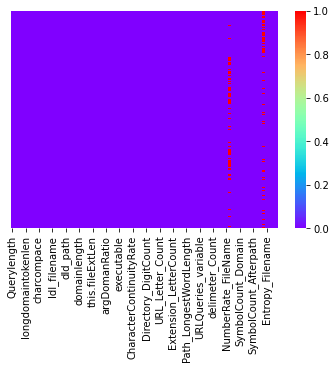

In [41]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap="rainbow")
plt.show()

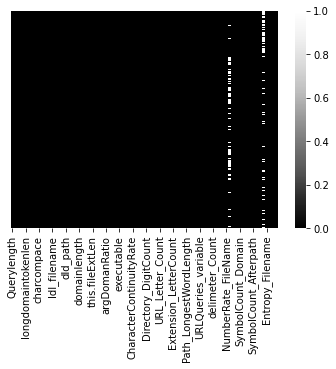

In [50]:
possible_cmap = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 
'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 
'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

sns.heatmap(df.isnull(), yticklabels = False, cbar = True, cmap="Greys_r")

plt.show()

In [44]:
df.duplicated().sum()

9754

In [45]:
n = len(df.columns)
n

80

In [46]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

## Function to clean data

In [12]:
# function loads, cleans and returns panda dataframe
def loadAndCleanData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)

        df = df.rename(str.strip, axis='columns')

        for col in df.columns:
            indexNames = df[df[col] == 'Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]== 'NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        df['argPathRatio'].astype('float')
        # drop NaN pandas way
        beforeRows = df.shape[0]
        df.dropna(inplace = True)
        print('Dropped {} rows with NaN values'.format(beforeRows - df.shape[0]))
        df.to_pickle(pickleDump)
        
    return df

In [47]:
df1 = loadAndCleanData('FinalDataset/All.csv')

c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

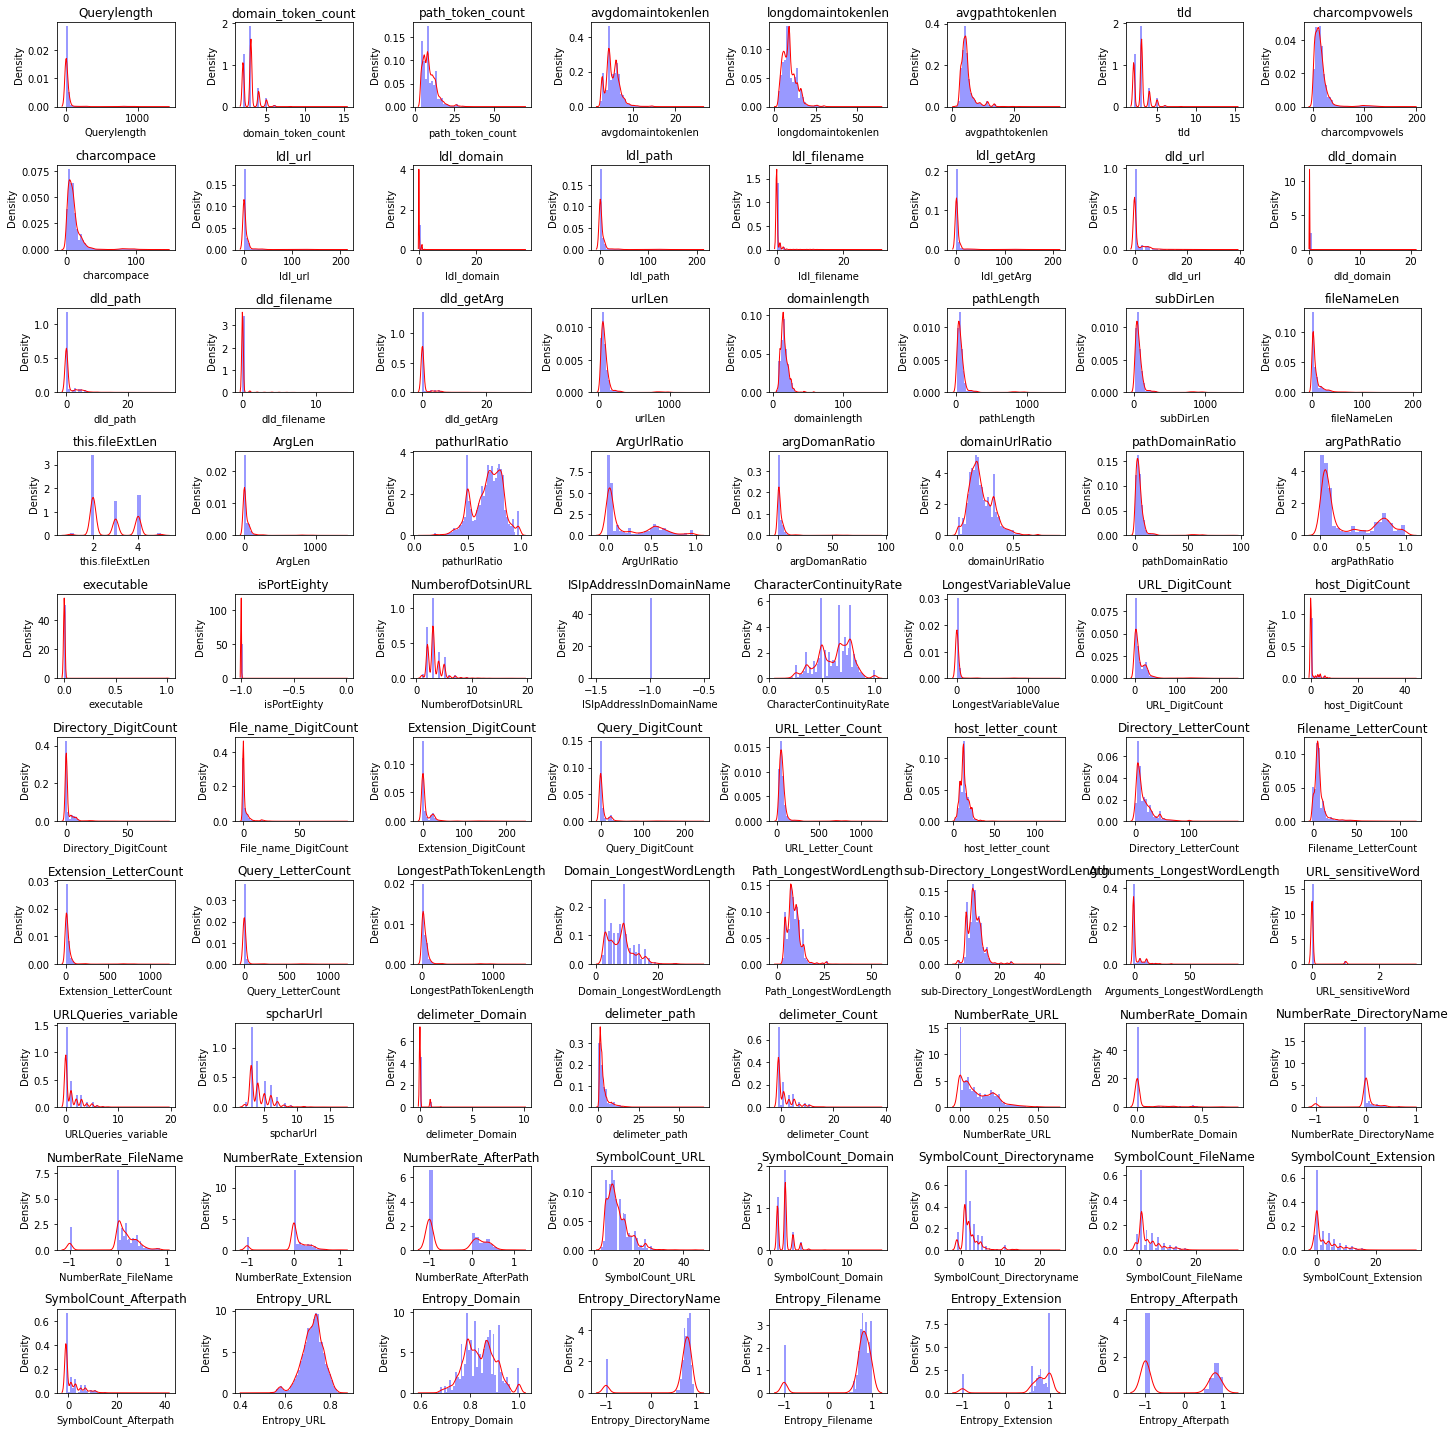

In [48]:
plt.figure(figsize=(20,20))
for i in range(len(df1.columns)-1):
  plt.subplot(10, 8, i+1)
  sns.distplot(df1[df1.columns[i]], kde_kws={"color": "r", "lw": 1, "label": "KDE"}, hist_kws={"color": "b"})          # distplot ==> displot or histplot
  plt.title(df1.columns[i])

plt.tight_layout()

## Data before cleaning

c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


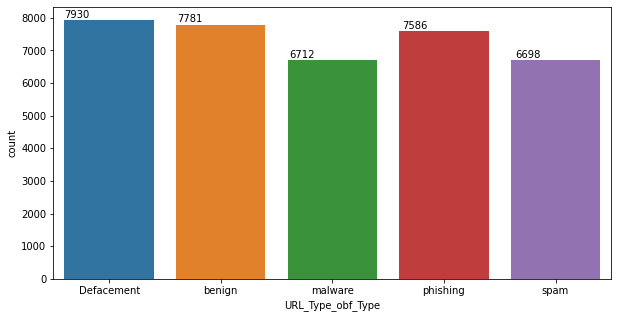

In [49]:
plt.figure(figsize = (10,5))
ax=sns.countplot(df['URL_Type_obf_Type'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

## Data after cleaning

c:\Users\cleme\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


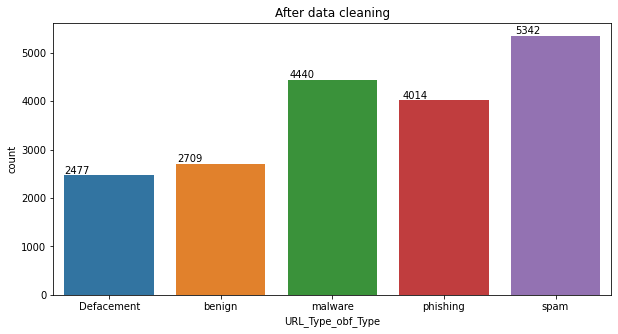

In [34]:
plt.figure(figsize = (10,5))
ax=sns.countplot(df1['URL_Type_obf_Type'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title("After data cleaning")
plt.show()

## Check the correlation between variables

In [17]:
correlations = df1.corr()

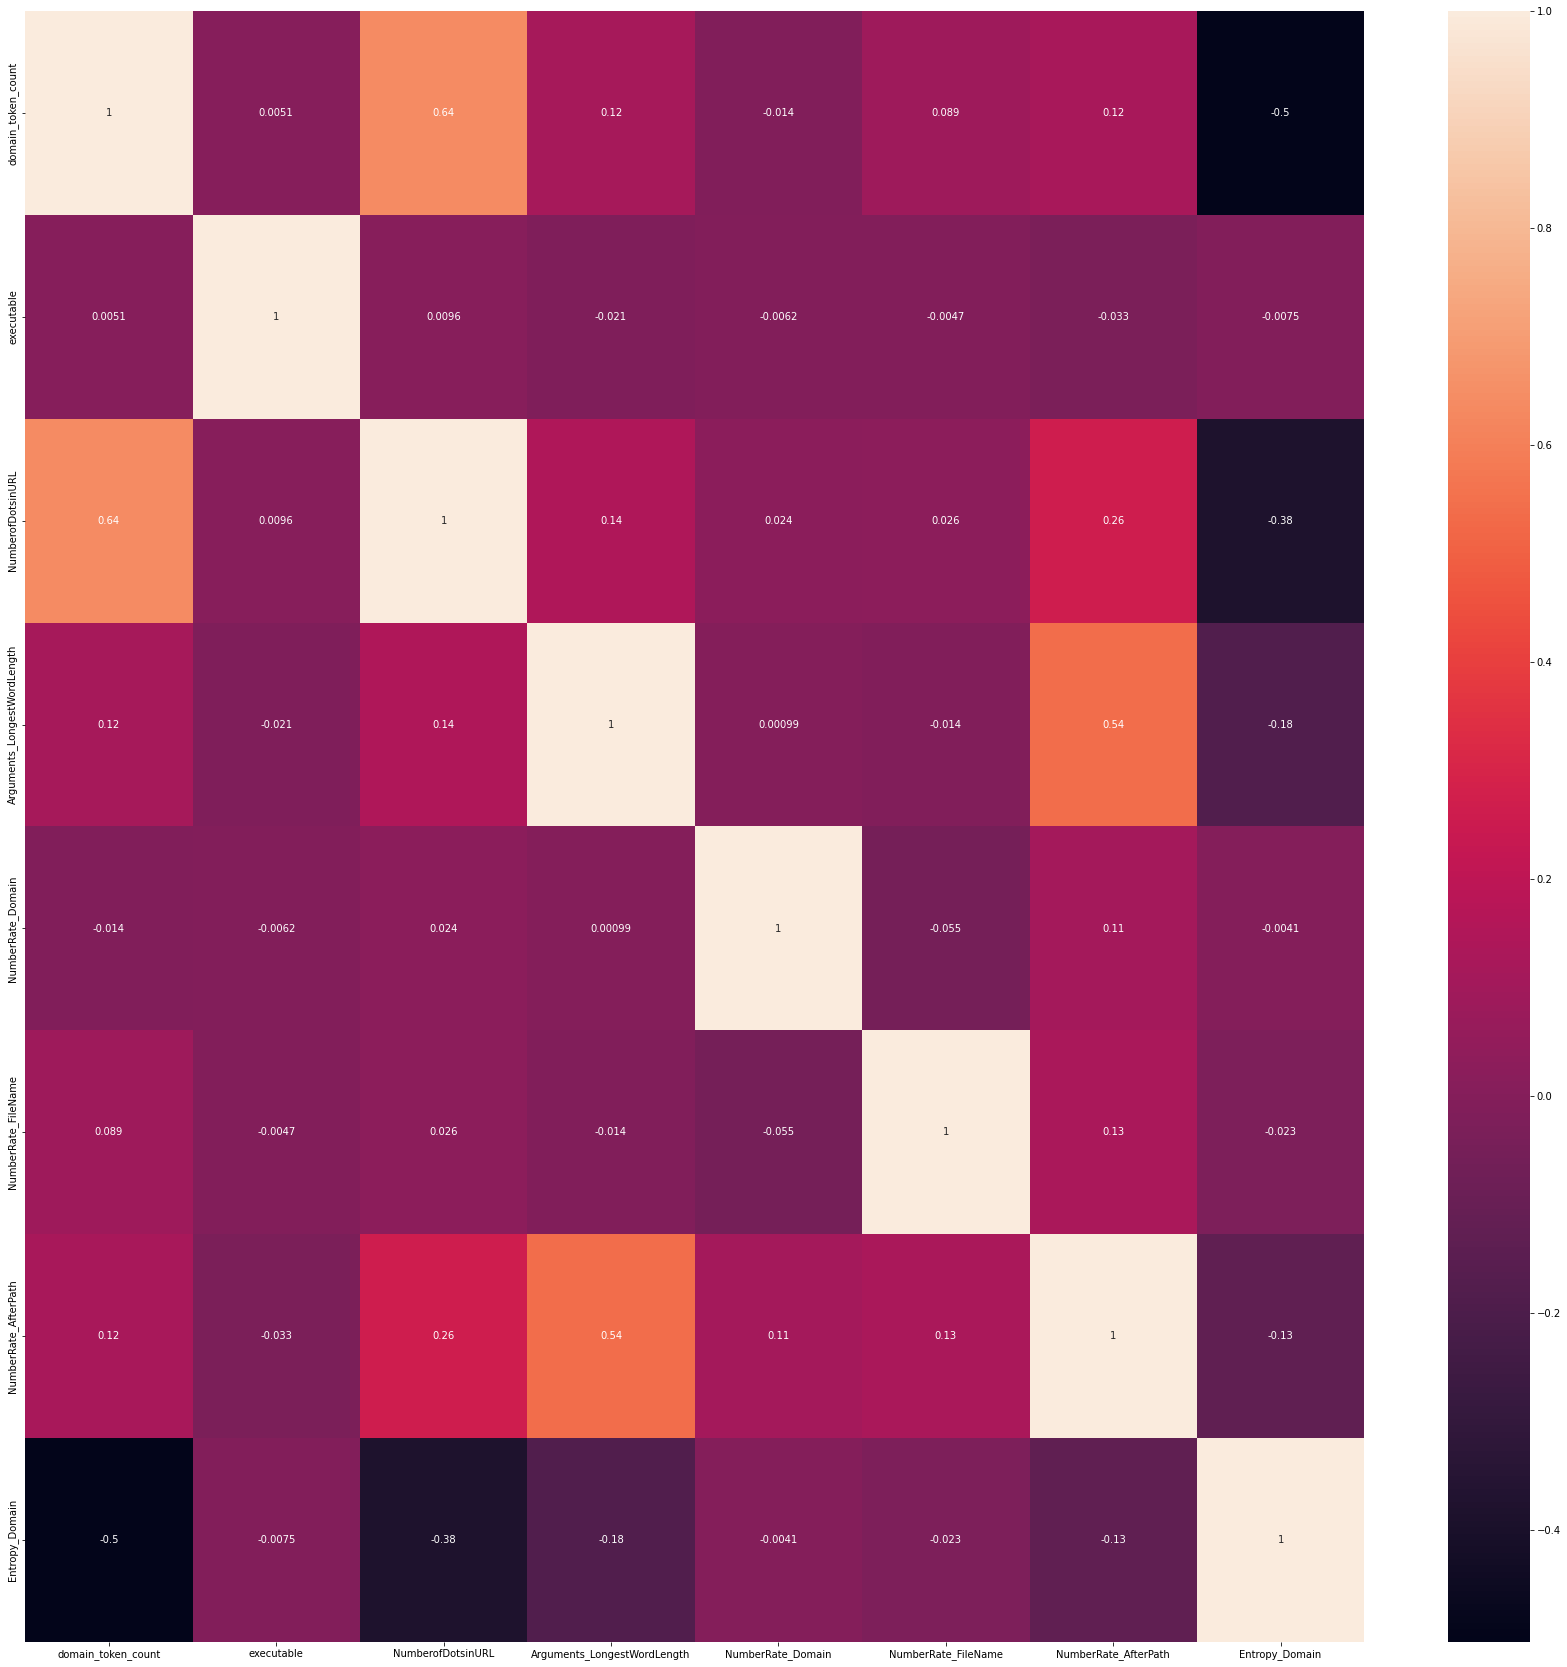

In [18]:
f, ax = plt.subplots(figsize = (30, 30))
sns.heatmap(correlations, annot = True)
plt.show()

## Dendrogramm plot

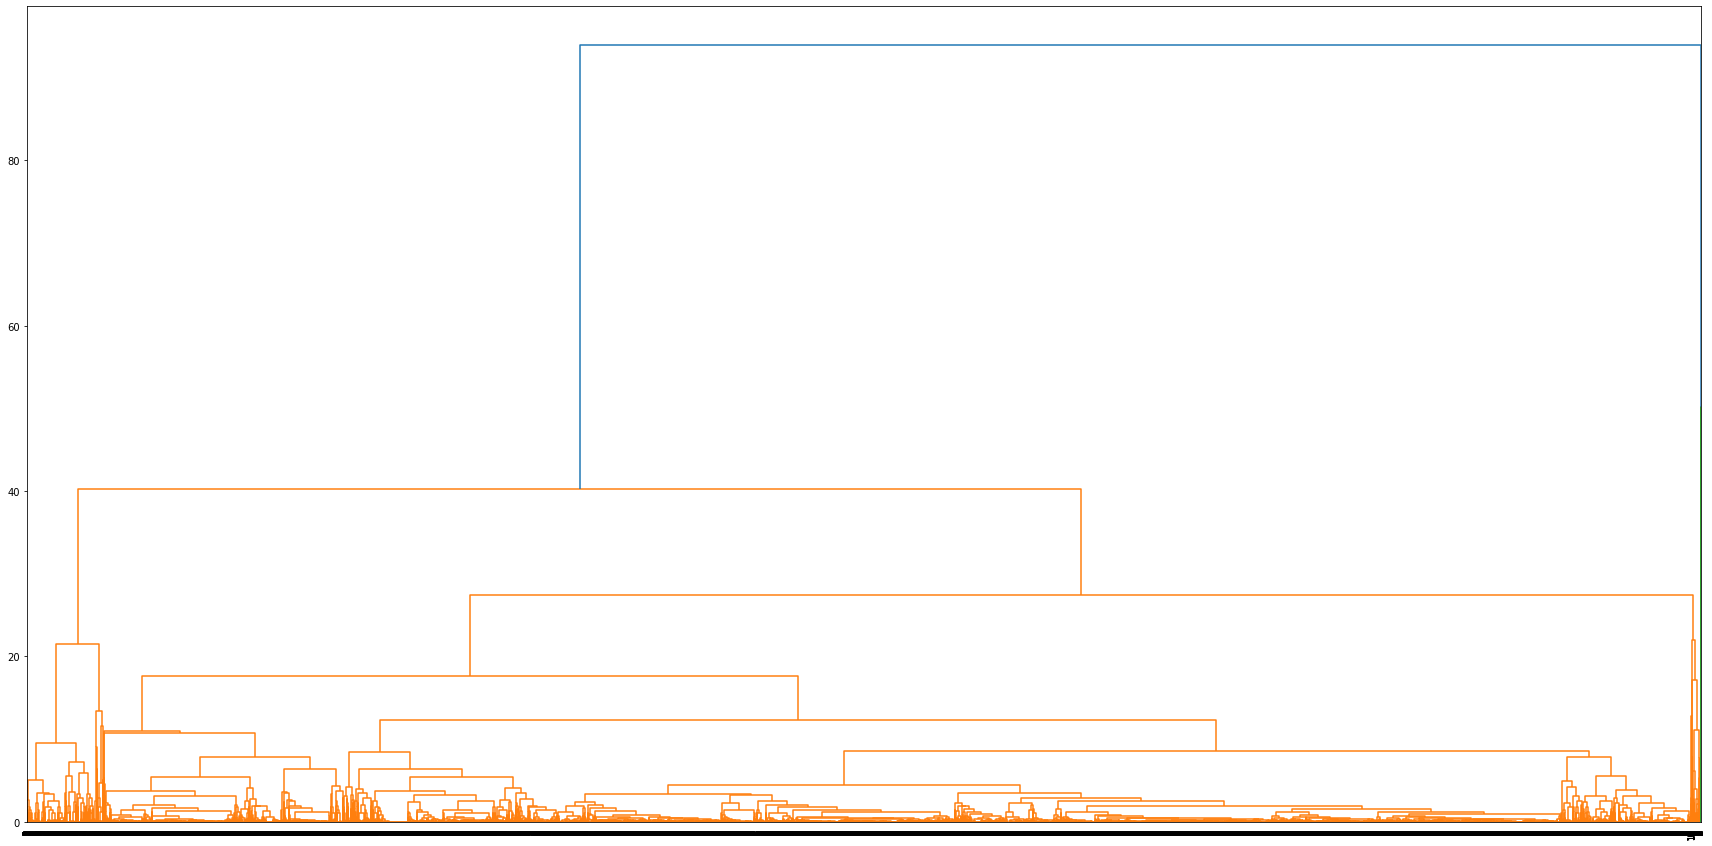

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# y = df1['URL_Type_obf_Type']
y = df['domain_token_count']
X = df.drop('class', axis=1)

from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(X, method='complete')

dendrogram(mergings, labels=y.values, leaf_rotation=90, leaf_font_size=8)

fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()